# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import and prepare data

In [2]:
# import article text

df_articles = pd.read_excel("/Users/oriold/Desktop/Masters_Contextual/articles_all_20k.xlsx")

df_articles.head(2)

,normalized_urls,headline,body
0,https://news.yahoo.com/did-nothing-wrong-famil...,'He did nothing wrong': Family of Texas entrep...,A tech entrepreneur in Texas wasn’t given ampl...
1,https://news.yahoo.com/deadline-for-real-i-ds-...,"Deadline for REAL IDs, required for domestic U...",(Photo Illustration: Jack Forbes/Yahoo News; P...


In [3]:
#rename column urls 

df_articles = df_articles.rename(columns={'normalized_urls': 'unique_urls'})

df_articles.head(1)

,unique_urls,headline,body
0,https://news.yahoo.com/did-nothing-wrong-famil...,'He did nothing wrong': Family of Texas entrep...,A tech entrepreneur in Texas wasn’t given ampl...


In [4]:
# import classified article data 

df_classified = pd.read_excel("/Users/oriold/Desktop/Masters_Contextual/unique_urls_classified_1203.xlsx")

df_classified.head(2)

,Unnamed: 0,unique_urls,IAS_GS_unsafe_flag,GS_DV_unsafe_flag,IAS_DV_unsafe_flag,IAS_unsafe_flag,GS_unsafe_flag,DV_unsafe_flag,headline,page_uuid,content_views
0,0,https://news.yahoo.com,unsafe,unsafe,unsafe,unsafe,unsafe,unsafe,NaN,NaN,0
1,1,https://news.yahoo.com/,unsafe,unsafe,unsafe,unsafe,unsafe,unsafe,NaN,NaN,0


In [5]:
#drop unnecessary columns from df_classified 

df_classified = df_classified[['unique_urls', 'IAS_GS_unsafe_flag',	'GS_DV_unsafe_flag','IAS_DV_unsafe_flag',
                                'IAS_unsafe_flag','GS_unsafe_flag','DV_unsafe_flag','page_uuid','content_views']]

df_classified.head(2)

,unique_urls,IAS_GS_unsafe_flag,GS_DV_unsafe_flag,IAS_DV_unsafe_flag,IAS_unsafe_flag,GS_unsafe_flag,DV_unsafe_flag,page_uuid,content_views
0,https://news.yahoo.com,unsafe,unsafe,unsafe,unsafe,unsafe,unsafe,NaN,0
1,https://news.yahoo.com/,unsafe,unsafe,unsafe,unsafe,unsafe,unsafe,NaN,0


In [6]:
df_classified = df_classified.sort_values(by="content_views", ascending=False)

df_classified = df_classified.reset_index(drop=True)

df_classified.head(2)

,unique_urls,IAS_GS_unsafe_flag,GS_DV_unsafe_flag,IAS_DV_unsafe_flag,IAS_unsafe_flag,GS_unsafe_flag,DV_unsafe_flag,page_uuid,content_views
0,https://news.yahoo.com/did-nothing-wrong-famil...,unsafe,unsafe,unsafe,unsafe,unsafe,unsafe,8d0dc70c-83ca-3032-bd4b-7a51d0c47d18,1297411
1,https://news.yahoo.com/deadline-for-real-i-ds-...,unsafe,unsafe,unsafe,unsafe,unsafe,safe,870b1a79-8072-4cbb-83ce-31e2529d601a,629616


In [7]:
#merge flags into the unique url dataframe 

df = pd.merge(df_articles, 
              df_classified, 
              on = 'unique_urls',
              how = 'left')

df.head(2)

,unique_urls,headline,body,IAS_GS_unsafe_flag,GS_DV_unsafe_flag,IAS_DV_unsafe_flag,IAS_unsafe_flag,GS_unsafe_flag,DV_unsafe_flag,page_uuid,content_views
0,https://news.yahoo.com/did-nothing-wrong-famil...,'He did nothing wrong': Family of Texas entrep...,A tech entrepreneur in Texas wasn’t given ampl...,unsafe,unsafe,unsafe,unsafe,unsafe,unsafe,8d0dc70c-83ca-3032-bd4b-7a51d0c47d18,1297411.0
1,https://news.yahoo.com/deadline-for-real-i-ds-...,"Deadline for REAL IDs, required for domestic U...",(Photo Illustration: Jack Forbes/Yahoo News; P...,unsafe,unsafe,unsafe,unsafe,unsafe,safe,870b1a79-8072-4cbb-83ce-31e2529d601a,629616.0


In [8]:
# import revenue data

df_revenue = pd.read_csv("/Users/oriold/Desktop/Masters_Contextual/december_2022_raw_data/maw_summary v_merged_revenue 2023-01-05T1850.csv")

df_revenue.head(2)

,Title,Canonical URL,Page Content UUID,Display Revenue
0,'He did nothing wrong': Family of Texas entrep...,https://news.yahoo.com/did-nothing-wrong-famil...,8d0dc70c-83ca-3032-bd4b-7a51d0c47d18,8605.19
1,"Deadline for REAL IDs, required for domestic U...",https://news.yahoo.com/deadline-for-real-i-ds-...,870b1a79-8072-4cbb-83ce-31e2529d601a,3758.81


In [9]:
#keep only columns that matter 

df_revenue = df_revenue[['Page Content UUID', 'Display Revenue']]

#rename column UUID 

df_revenue = df_revenue.rename(columns={'Page Content UUID': 'page_uuid'})

In [10]:
#merge flags into the unique url dataframe 

df = pd.merge(df, 
              df_revenue, 
              on = 'page_uuid',
              how = 'left')

df.head(2)

,unique_urls,headline,body,IAS_GS_unsafe_flag,GS_DV_unsafe_flag,IAS_DV_unsafe_flag,IAS_unsafe_flag,GS_unsafe_flag,DV_unsafe_flag,page_uuid,content_views,Display Revenue
0,https://news.yahoo.com/did-nothing-wrong-famil...,'He did nothing wrong': Family of Texas entrep...,A tech entrepreneur in Texas wasn’t given ampl...,unsafe,unsafe,unsafe,unsafe,unsafe,unsafe,8d0dc70c-83ca-3032-bd4b-7a51d0c47d18,1297411.0,8605.19
1,https://news.yahoo.com/deadline-for-real-i-ds-...,"Deadline for REAL IDs, required for domestic U...",(Photo Illustration: Jack Forbes/Yahoo News; P...,unsafe,unsafe,unsafe,unsafe,unsafe,safe,870b1a79-8072-4cbb-83ce-31e2529d601a,629616.0,3758.81


# Start EDA

In [11]:
df.shape

(12140, 12)

In [12]:
#delete all rows that don't have revenue data associated 

df_eda = df.dropna(axis=0, subset=['Display Revenue'])

df_eda.shape

(1172, 12)

Calculate yield difference for GS and DV

In [13]:
# understand yield by classification type

df_yield = df_eda.groupby('GS_DV_unsafe_flag').apply(lambda x: x['Display Revenue'].sum()/x['content_views'].sum()*100)

#calculate pct difference between safe and unsafe 

pct_diff = (df_yield[0]-df_yield[1])/df_yield[1]*100

#transform to dataframe

df_yield = pd.DataFrame(df_yield)

# format the df

df_yield.columns = df_yield.columns.to_flat_index()

df_yield = df_yield.reset_index()

df_yield = df_yield.rename(columns={0: 'yield'})

df_yield['yield'] = df_yield['yield'].round(2)


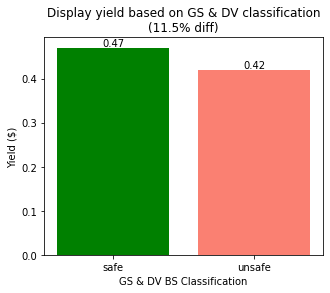

In [14]:
#define a function to show the yield differences by brand safety category 

x = df_yield['GS_DV_unsafe_flag']

y = df_yield["yield"]

def yield_chart(x, y, vendor):
    fig, ax = plt.subplots(figsize=(5,4))
    bar_colors = ["green", "salmon"]
    ax.set_title("Display yield based on {} classification\n({:.1f}% diff)".format(vendor,pct_diff))
    p1 = ax.bar(x, y, label = x.values, color = bar_colors)
    ax.bar_label(p1)
    ax.set_xlabel("{} BS Classification".format(vendor))
    ax.set_ylabel("Yield ($)")

yield_chart(x, y, "GS & DV")

Calculate yield difference for IAS

In [15]:
# understand yield by classification type

df_yield = df_eda.groupby('IAS_unsafe_flag').apply(lambda x: x['Display Revenue'].sum()/x['content_views'].sum()*100)

#calculate pct difference between safe and unsafe 

pct_diff = (df_yield[0]-df_yield[1])/df_yield[1]*100

#transform to dataframe

df_yield = pd.DataFrame(df_yield)

# format the df

df_yield.columns = df_yield.columns.to_flat_index()

df_yield = df_yield.reset_index()

df_yield = df_yield.rename(columns={0: 'yield'})

df_yield['yield'] = df_yield['yield'].round(2)


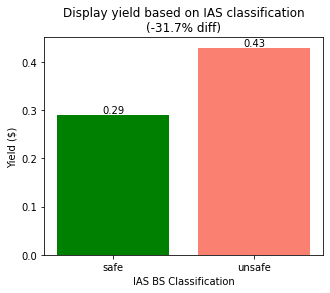

In [16]:
# chart yield difference for IAS

x = df_yield['IAS_unsafe_flag']

y = df_yield["yield"]

yield_chart(x, y, "IAS")

Calculate yield difference for GS only

In [17]:
# understand yield by classification type

df_yield = df_eda.groupby('GS_unsafe_flag').apply(lambda x: x['Display Revenue'].sum()/x['content_views'].sum()*100)

#calculate pct difference between safe and unsafe 

pct_diff = (df_yield[0]-df_yield[1])/df_yield[1]*100

#transform to dataframe

df_yield = pd.DataFrame(df_yield)

# format the df

df_yield.columns = df_yield.columns.to_flat_index()

df_yield = df_yield.reset_index()

df_yield = df_yield.rename(columns={0: 'yield'})

df_yield['yield'] = df_yield['yield'].round(2)


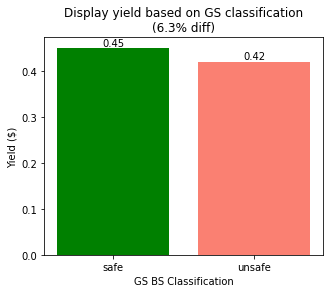

In [18]:
# chart yield difference for GS

x = df_yield['GS_unsafe_flag']

y = df_yield["yield"]

yield_chart(x, y, "GS")

Calculate yield difference for DV only

In [19]:
# understand yield by classification type

df_yield = df_eda.groupby('DV_unsafe_flag').apply(lambda x: x['Display Revenue'].sum()/x['content_views'].sum()*100)

#calculate pct difference between safe and unsafe 

pct_diff = (df_yield[0]-df_yield[1])/df_yield[1]*100

#transform to dataframe

df_yield = pd.DataFrame(df_yield)

# format the df

df_yield.columns = df_yield.columns.to_flat_index()

df_yield = df_yield.reset_index()

df_yield = df_yield.rename(columns={0: 'yield'})

df_yield['yield'] = df_yield['yield'].round(2)


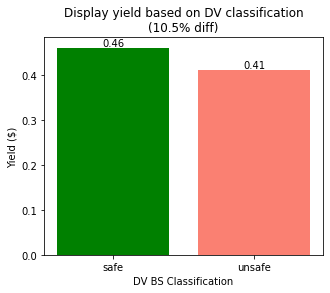

In [20]:
# chart yield difference for GS

x = df_yield['DV_unsafe_flag']

y = df_yield["yield"]

yield_chart(x, y, "DV")

# Understand the distribution of yield by article classification

In [21]:
#add yield calculation to the EDA df 

df_eda['yield'] = df_eda['Display Revenue']/df_eda['content_views']*100

df_eda['yield'] = df_eda['yield'].round(2)

df_eda.head(2)

/var/folders/dj/h6m1714d6p510xvgy0_f10cm0000gq/T/ipykernel_66466/2886682674.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eda['yield'] = df_eda['Display Revenue']/df_eda['content_views']*100
/var/folders/dj/h6m1714d6p510xvgy0_f10cm0000gq/T/ipykernel_66466/2886682674.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eda['yield'] = df_eda['yield'].round(2)


,unique_urls,headline,body,IAS_GS_unsafe_flag,GS_DV_unsafe_flag,IAS_DV_unsafe_flag,IAS_unsafe_flag,GS_unsafe_flag,DV_unsafe_flag,page_uuid,content_views,Display Revenue,yield
0,https://news.yahoo.com/did-nothing-wrong-famil...,'He did nothing wrong': Family of Texas entrep...,A tech entrepreneur in Texas wasn’t given ampl...,unsafe,unsafe,unsafe,unsafe,unsafe,unsafe,8d0dc70c-83ca-3032-bd4b-7a51d0c47d18,1297411.0,8605.19,0.66
1,https://news.yahoo.com/deadline-for-real-i-ds-...,"Deadline for REAL IDs, required for domestic U...",(Photo Illustration: Jack Forbes/Yahoo News; P...,unsafe,unsafe,unsafe,unsafe,unsafe,safe,870b1a79-8072-4cbb-83ce-31e2529d601a,629616.0,3758.81,0.60


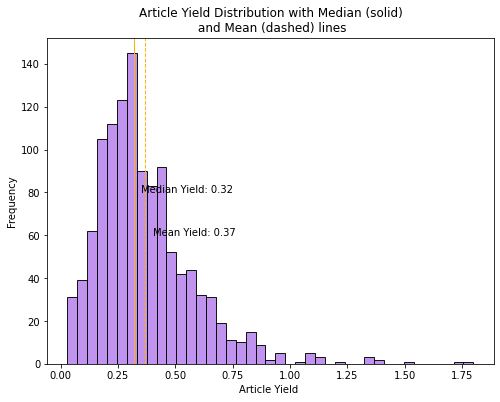

In [22]:
def histogram_median_mean(x, feature_name):
    plt.rcParams["figure.figsize"] = (8,6)
    result = plt.hist(x, bins='auto', color='#b887ed', alpha=0.9, edgecolor ='k')
    plt.axvline(x.mean(), color='#ffb20a', linestyle='dashed',linewidth=1, label=x.mean)
    #plt.axvline(x.mean() + x.std(), color='#d3d3d5', linestyle='dashed',linewidth=1, label=x.std)
    #plt.axvline(x.mean() - x.std(), color='#d3d3d5', linestyle='dashed',linewidth=1, label=x.std)
    plt.axvline(x.median(), color='#ffb20a', linestyle='solid',linewidth=1, label=x.median)
    plt.title('{} '.format(feature_name)+"Distribution with Median (solid)\n and Mean (dashed) lines")
    plt.xlabel('{} '.format(feature_name))
    plt.ylabel("Frequency")
    plt.text(x.mean()*1.1, 60,'Mean Yield: {:.2f}'.format(x.mean()))
    #plt.text(x.mean() + x.std()*1.1, 30,'Stdev: {:.2f}'.format(x.mean() + x.std()))
    #plt.text(x.mean() - x.std()*1.1, 30,'Stdev: {:.2f}'.format(x.mean() - x.std()))
    plt.text(x.median()*1.1, 80, 'Median Yield: {:.2f}'.format(x.median()))

    plt.show()

x = df_eda['yield']

histogram_median_mean(x, "Article Yield")
    

The distribution of article yields seems to follow a distribution with right skew (positively skewed)

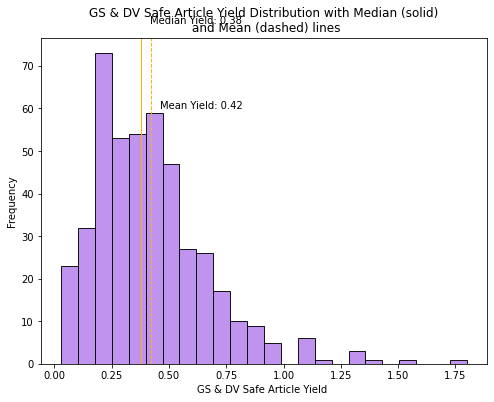

In [23]:
# plot the distribution of safe articles according to both GS and DV 

x = df_eda['yield'].loc[df['GS_DV_unsafe_flag']=='safe']

histogram_median_mean(x, "GS & DV Safe Article Yield")

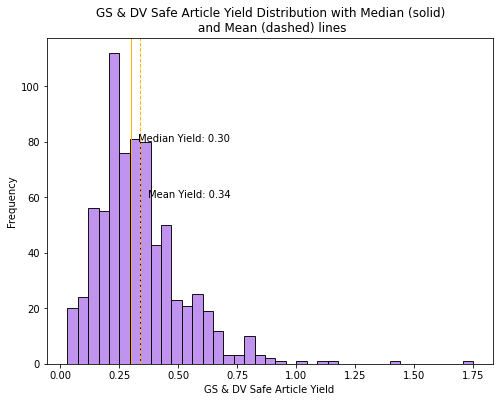

In [24]:
# plot the distribution of safe articles according to both GS and DV 

x = df_eda['yield'].loc[df['GS_DV_unsafe_flag']=='unsafe']

histogram_median_mean(x, "GS & DV Safe Article Yield")

Conduct a t-test to understand if the averages of Safe and Unsafe are statistically siginificant

In [25]:
# calculate the variance of yield between safe and unsafe 

gsdv_safe_yield = df_eda['yield'].loc[df_eda['GS_DV_unsafe_flag']=='safe']

gsdv_unsafe_yield = df_eda['yield'].loc[df_eda['GS_DV_unsafe_flag']=='unsafe']

# Print the variance of both data groups
print(np.var(gsdv_safe_yield), np.var(gsdv_unsafe_yield))


0.0634553392059949 0.03378985436189372


variance is less than 4:1 ratio so we can consider the two groups have equal variance

In [26]:
# Import the library
import scipy.stats as stats

# Perform the two sample t-test with equal variances
stats.ttest_ind(a=gsdv_safe_yield, b=gsdv_unsafe_yield, equal_var=True)

Ttest_indResult(statistic=6.567075743473833, pvalue=7.699736532247139e-11)

p-value is lower than the significance level alpha 0.05 so we can reject the null hypothesis (both samples have the same mean) and assume that the actual mean of the entire popuation of safe and unsafe articles is different

Understand if the data is normally distributed

In [27]:
#perform test to understand if the yield distribution is normal 

# compute test statistic
from scipy.stats import shapiro

alpha = 0.05 # significance level = (1 - required confidence level)

stat, p = shapiro(df_eda['yield'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > alpha:
	print('The sample is p=%.3f normally distributed' % (p))
else:
	print('Probably not normally distributed')


stat=0.889, p=0.000
Probably not normally distributed


In [28]:
# augostino
from scipy.stats import normaltest
stat, p = normaltest(df_eda['yield'])

print('stat=%.3f, p=%.3f' % (stat, p))
if p > alpha:
	print('The sample is p=%.3f normally distributed' % (p))
else:
	print('Probably not normally distributed')


stat=438.623, p=0.000
Probably not normally distributed


In [29]:
# anderson
from scipy.stats import anderson
stat, p = normaltest(df_eda['yield'])

print('stat=%.3f, p=%.3f' % (stat, p))
if p > alpha:
	print('The sample is p=%.3f normally distributed' % (p))
else:
	print('Probably not normally distributed')


stat=438.623, p=0.000
Probably not normally distributed


In [30]:
# identify the type of data distribution for yield 

dist_names = ['weibull_min','norm','weibull_max','beta',
              'invgauss','uniform','gamma','expon',   
              'lognorm','pearson3','triang']

In [31]:
from sklearn.preprocessing import StandardScaler

def standarise(column,pct,pct_lower):
    sc = StandardScaler() 
    y = df_eda[column][df_eda[column].notnull()].to_list()
    y.sort()
    len_y = len(y)
    y = y[int(pct_lower * len_y):int(len_y * pct)]
    len_y = len(y)
    yy=([[x] for x in y])
    sc.fit(yy)
    y_std =sc.transform(yy)
    y_std = y_std.flatten()
    return y_std,len_y,y

In [32]:
import scipy.stats

In [33]:

def fit_distribution(column,pct,pct_lower):
    # Set up list of candidate distributions to use
    y_std,size,y_org = standarise(column,pct,pct_lower)
    dist_names = ['weibull_min','norm','weibull_max','beta',
                 'invgauss','uniform','gamma','expon', 'lognorm','pearson3','triang']

    chi_square_statistics = []
    # 11 bins
    percentile_bins = np.linspace(0,100,11)
    percentile_cutoffs = np.percentile(y_std, percentile_bins)
    observed_frequency, bins = (np.histogram(y_std, bins=percentile_cutoffs))
    cum_observed_frequency = np.cumsum(observed_frequency)

    # Loop through candidate distributions

    for distribution in dist_names:
        # Set up distribution and get fitted distribution parameters
        dist = getattr(scipy.stats, distribution)
        param = dist.fit(y_std)
        print("{}\n{}\n".format(dist, param))
      

        # Get expected counts in percentile bins
        # cdf of fitted sistrinution across bins
        cdf_fitted = dist.cdf(percentile_cutoffs, *param)
        expected_frequency = []
        for bin in range(len(percentile_bins)-1):
            expected_cdf_area = cdf_fitted[bin+1] - cdf_fitted[bin]
            expected_frequency.append(expected_cdf_area)

        # Chi-square Statistics
        expected_frequency = np.array(expected_frequency) * size
        cum_expected_frequency = np.cumsum(expected_frequency)
        ss = round(sum (((cum_expected_frequency - cum_observed_frequency) ** 2) / cum_observed_frequency),0)
        chi_square_statistics.append(ss)


    #Sort by minimum ch-square statistics
    results = pd.DataFrame()
    results['Distribution'] = dist_names
    results['chi_square'] = chi_square_statistics
    results.sort_values(['chi_square'], inplace=True)


    print ('\nDistributions listed by Betterment of fit:')
    print ('............................................')
    print (results)

In [34]:
# fit multiple distributions to see which one fits better the yield column 

fit_distribution('yield',0.99,0.01)


(0.9906895654821561, -1.6491247303730654, 1.279137428073775)

(-4.947207907816189e-17, 0.9999999999999998)

(33300984.14848073, 25731088.131461106, 25731088.58424581)

(2.8696009920749668, 29.03171004713006, -1.8024363884846126, 20.037914412447776)

(0.15492197996075957, -2.574475467210938, 16.61788724082762)

(-1.6491247303730652, 5.568080518746738)

(3.4505569206822067, -1.8710847735877563, 0.5422550985962931)

(-1.6491247303730652, 1.6491247303730652)



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:639: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


(0.39046319197752966, -2.515616775377708, 2.3324020325038957)

(1.0766591199157904, -4.739310429342155e-17, 1.0072551494741866)

(0.12984762871172284, -1.7527442682020697, 5.6987705586924715)


Distributions listed by Betterment of fit:
............................................
   Distribution  chi_square
2   weibull_max         1.0
8       lognorm         2.0
4      invgauss         3.0
6         gamma         6.0
9      pearson3         6.0
3          beta         8.0
1          norm       140.0
10       triang       163.0
7         expon       905.0
5       uniform       938.0
0   weibull_min      1894.0


Looks like our data fits more a weibull max distribution

In [35]:
def standarise2(column,pct,pct_lower):
    sc = StandardScaler() 
    y = df_eda[column][df_eda[column].notnull()].to_list()
    y.sort()
    len_y = len(y)
    y = y[int(pct_lower * len_y):int(len_y * pct)]
    len_y = len(y)
    yy=([[x] for x in y])
    sc.fit(yy)
    y_std =sc.transform(yy)
    y_std = y_std.flatten()
    return y_std, y

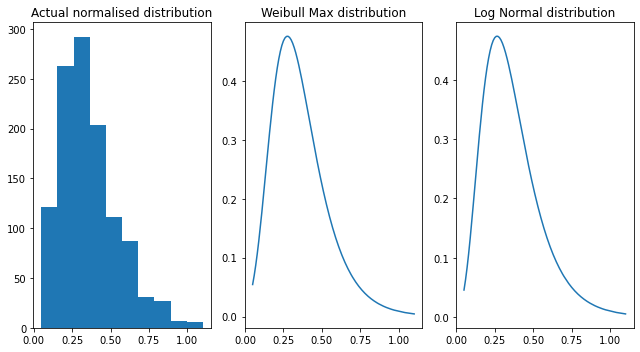

In [36]:
#visualize the results 

from scipy.stats import weibull_max
from scipy.stats import lognorm

y_std, y = standarise2('yield',0.99,0.01)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9, 5))
# Histogram Plot of Observed Data
axes[0].hist(y)
axes[0].set_title("Actual normalised distribution")
#Weibull Max Distribution Fitting
axes[1].plot(y,weibull_max.pdf(y_std,33300984.15, 25731088.13, 25731088.58))
axes[1].set_title("Weibull Max distribution")
#LogNorm Distribution Fitting
axes[2].plot(y,lognorm.pdf(y_std,0.39, -2.51, 2.33))
axes[2].set_title("Log Normal distribution")
fig.tight_layout()

There are several statistical tests that you can use to compare the means of two groups when the data are not normally distributed. Some options include:

The Wilcoxon rank-sum test, also known as the Mann-Whitney U test. This is a nonparametric test that compares the means of the two groups by ranking the data from lowest to highest and comparing the ranks of the data from each group.

The Kruskal-Wallis test. This is also a nonparametric test that compares the means of two or more groups by ranking the data from lowest to highest and comparing the ranks across the groups.

In [37]:
#run Wilcoxon rank-sum test

from scipy.stats import ranksums

ranksums(gsdv_safe_yield, gsdv_unsafe_yield)

RanksumsResult(statistic=5.754289942959497, pvalue=8.700671577764918e-09)

Wilcoxon rank-sum has a p-value of less than 5% which rejects the null hypothesis and indicates the 2 samples have different mean values

In [38]:
#run Kruskal-Wallis test

from scipy import stats

stats.kruskal(gsdv_safe_yield, gsdv_unsafe_yield)

KruskalResult(statistic=33.12392163490583, pvalue=8.646833585489427e-09)

Kruskal-Wallis test also rejects the null hypothesis

# Understand the distribution of unsafe and safe articles

In [39]:
df.columns.to_list()

['unique_urls',
 'headline',
 'body',
 'IAS_GS_unsafe_flag',
 'GS_DV_unsafe_flag',
 'IAS_DV_unsafe_flag',
 'IAS_unsafe_flag',
 'GS_unsafe_flag',
 'DV_unsafe_flag',
 'page_uuid',
 'content_views',
 'Display Revenue']

In [40]:
res = df.groupby('IAS_GS_unsafe_flag').size()

res[0]

37

In [41]:
vendor_list = ['IAS_GS_unsafe_flag',
 'GS_DV_unsafe_flag',
 'IAS_DV_unsafe_flag',
 'IAS_unsafe_flag',
 'GS_unsafe_flag',
 'DV_unsafe_flag']

for i in vendor_list:
    res = df.groupby(i).size()
    prop = res[0]/(res[0]+res[1])*100
    print("Proportion of safe articles based on {} classification is {:.1f}%".format(i, prop))

Proportion of safe articles based on IAS_GS_unsafe_flag classification is 1.9%
Proportion of safe articles based on GS_DV_unsafe_flag classification is 43.3%
Proportion of safe articles based on IAS_DV_unsafe_flag classification is 2.9%
Proportion of safe articles based on IAS_unsafe_flag classification is 3.2%
Proportion of safe articles based on GS_unsafe_flag classification is 53.7%
Proportion of safe articles based on DV_unsafe_flag classification is 67.2%
